# Chapter 5 Questions
## Medium

## M.1
Example of a Spurious Correlation <br>
Outcome: Depression rates per country <br>
Predictors: Average hours of darkness per day & Number of Books written per Capita <br>
Both seem to be positively correlated to the outcome <br>
When regressed together the effect of number of books per capita disappears as it's positively correlated with the other predictor


## M.2
Example of a Masked Relationship <br>


## M.3
How might a high divorce rate cause a higher marriage? <br>
Flipping the association around a high divorce rate might cause a higher marriage rate as, it might mean a few things: <br>
- People who have divorced might be more propense to remarry, creating a double counting in marriage rate
- Might be a culture where marriage is widespread

## Hard
## H.1

In [34]:
library(rethinking)
library(plyr)
library(dplyr)
data(foxes)
d <- foxes
str(d)

summary(d)

'data.frame':	116 obs. of  5 variables:
 $ group    : int  1 1 2 2 3 3 4 4 5 5 ...
 $ avgfood  : num  0.37 0.37 0.53 0.53 0.49 0.49 0.45 0.45 0.74 0.74 ...
 $ groupsize: int  2 2 2 2 2 2 2 2 3 3 ...
 $ area     : num  1.09 1.09 2.05 2.05 2.12 2.12 1.29 1.29 3.78 3.78 ...
 $ weight   : num  5.02 2.84 5.33 6.07 5.85 3.25 4.53 4.09 6.13 5.59 ...


     group          avgfood         groupsize          area      
 Min.   : 1.00   Min.   :0.3700   Min.   :2.000   Min.   :1.090  
 1st Qu.:11.75   1st Qu.:0.6600   1st Qu.:3.000   1st Qu.:2.590  
 Median :18.00   Median :0.7350   Median :4.000   Median :3.130  
 Mean   :17.21   Mean   :0.7517   Mean   :4.345   Mean   :3.169  
 3rd Qu.:24.00   3rd Qu.:0.8000   3rd Qu.:5.000   3rd Qu.:3.772  
 Max.   :30.00   Max.   :1.2100   Max.   :8.000   Max.   :5.070  
     weight     
 Min.   :1.920  
 1st Qu.:3.720  
 Median :4.420  
 Mean   :4.530  
 3rd Qu.:5.375  
 Max.   :7.550  

       Mean StdDev   5.5% 94.5%
a     4.444  0.390  3.820 5.068
ba    0.027  0.118 -0.162 0.216
sigma 1.179  0.077  1.055 1.302

[ 1000 / 1000 ]


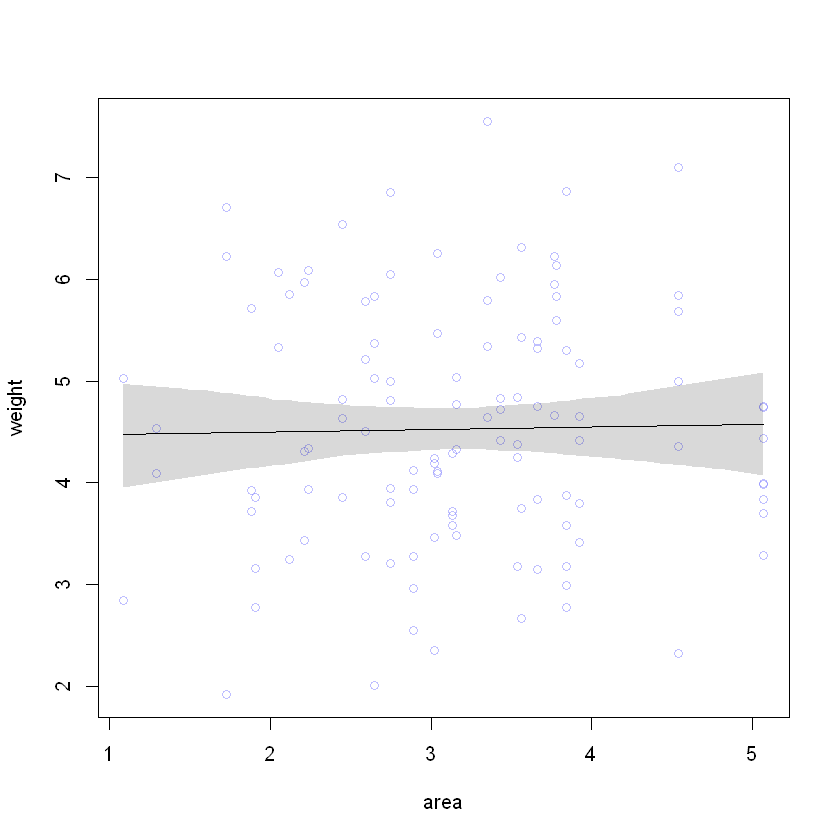

In [28]:
m.area <- map(
  alist(
    weight ~ dnorm(mu, sigma),
    mu  <- a + ba * area,
    a ~ dnorm(0, 10),
    ba ~ dnorm(0, 5),
    sigma ~ dunif(0, 10)
  ), data = d)
precis(m.area, digits = 3)

area.seq <- seq(from = min(d$area), to = max(d$area), length.out = 100)
pred.data <- data.frame(area = area.seq)
mu <- link(m.area, data = pred.data)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob = 0.95)

plot(weight ~ area, d, col = col.alpha(rangi2, 0.5))
lines(area.seq, mu.mean)
shade(mu.PI, area.seq)

        Mean StdDev   5.5%  94.5%
a      5.063  0.325  4.544  5.581
bg    -0.123  0.070 -0.235 -0.010
sigma  1.164  0.076  1.041  1.286

[ 1000 / 1000 ]


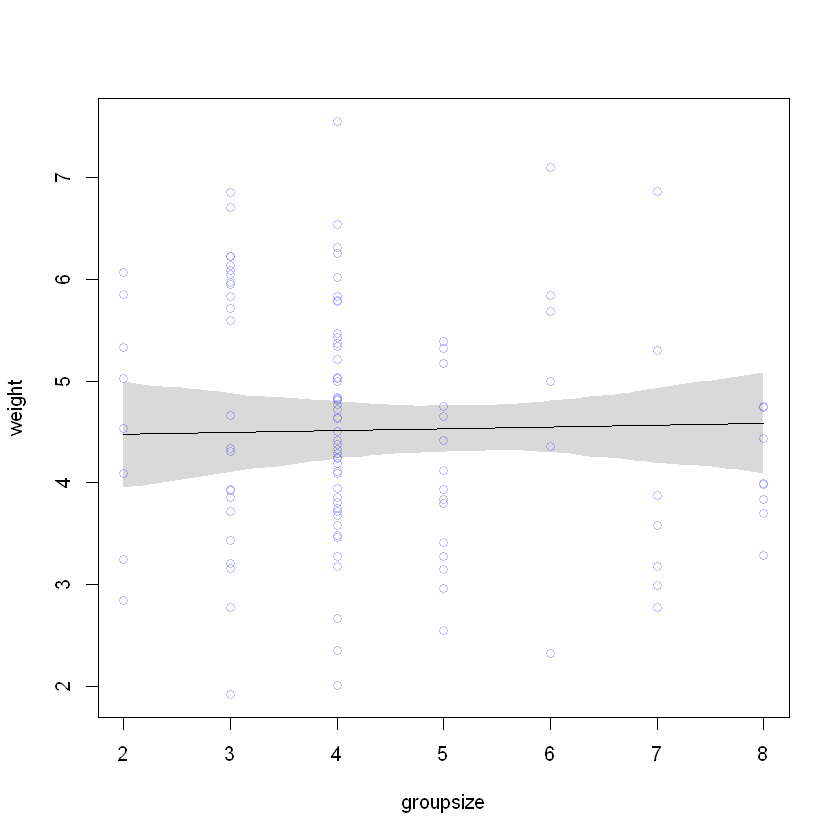

In [33]:
m.gs <- map(
  alist(
    weight ~ dnorm(mu, sigma),
    mu  <- a + bg * groupsize,
    a ~ dnorm(0, 10),
    bg ~ dnorm(0, 5),
    sigma ~ dunif(0, 10)
  ), data = d)
precis(m.gs, digits = 3)

groupsize.seq <- seq(from = min(d$groupsize), to = max(d$groupsize), length.out = 100)
pred.data <- data.frame(area = area.seq)
mu <- link(m.area, data = pred.data)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob = 0.95)

plot(weight ~ groupsize, d, col = col.alpha(rangi2, 0.5))
lines(groupsize.seq, mu.mean)
shade(mu.PI, groupsize.seq)

Both variables are pretty bad at predicting weight. <br>
The intercept for Area is 4.44, which means that at area of 0 the model predicts the fox will have a weight of 4.44. The slope for area is 0.027, which means that to have lower weight than this (min weight in dataset is 1.92) the fox will need to leave in an area with negative weight (Impossible!). <br>
Furthermore, max area is 5.070 which means that the model will predict a weight of around 4.57 where max weight is 7. So the model is not a very good predictor of weight. <br>
Same argument can be made for the groupsize model.

## H2

Run all of the code without normalizing and I think I'll get 

In [38]:
m.multi <- map(
  alist(
    weight ~ dnorm(mu, sigma),
    mu  <- a + ba * area + bg * groupsize,
    a ~ dnorm(0, 10),
    ba ~ dnorm(0, 5),
    bg ~ dnorm(0, 5),
    sigma ~ dunif(0, 10)
  ), data = d)
precis(m.multi)

area.avg <- mean(d$area)
gs.avg <- mean(d$groupsize)
gs.seq <- seq(from = min(d$groupsize), to = max(d$groupsize), length.out = 100)
area.seq <- seq(from = min(d$area), to = max(d$area), length.out = 100)

data.pred.area <- data.frame(groupsize = gs.avg, area = area.seq)
data.pred.gs <- data.frame(groupsize = gs.seq, area = area.avg)

mu.area <- link(m.multi, data.pred.area)
mu.a.mean <- apply(mu.area, 2, mean)
mu.a.PI <- apply(mu.area, 2, PI, prob = 0.95)
R.a.sim <- sim(m.multi, data = data.pred.area, n = 1e4)
R.a.PI <- apply(R.a.sim, 2, PI)

mu.gs <- link(m.multi, data.pred.gs)
mu.gs.mean <- apply(mu.gs, 2, mean)
mu.gs.PI <- apply(mu.gs, 2, PI, prob = 0.95)
R.gs.sim <- sim(m.multi, data = data.pred.gs, n = 1e4)
R.gs.PI <- apply(R.gs.sim, 2, PI)

       Mean StdDev  5.5% 94.5%
a      4.45   0.37  3.85  5.04
ba     0.62   0.20  0.30  0.94
bg    -0.43   0.12 -0.62 -0.24
sigma  1.12   0.07  1.00  1.24

[ 1000 / 1000 ]
[ 10000 / 10000 ]
[ 1000 / 1000 ]
[ 10000 / 10000 ]


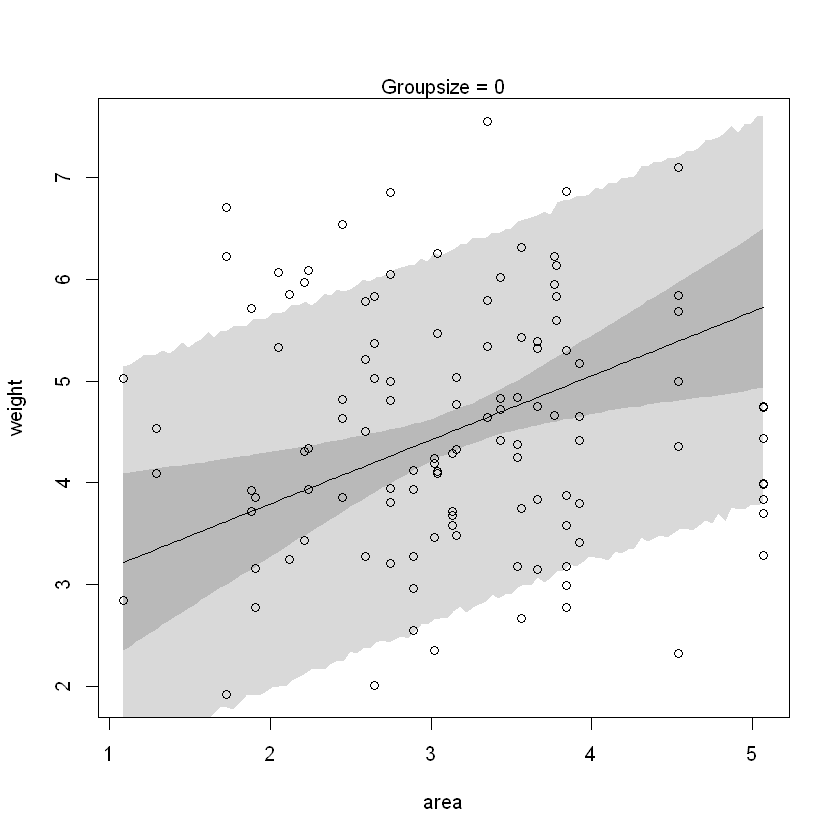

In [39]:
plot(weight ~ area, data = d)
mtext('Groupsize = 0')
lines(area.seq, mu.a.mean)
shade(mu.a.PI, area.seq)
shade(R.a.PI, area.seq)

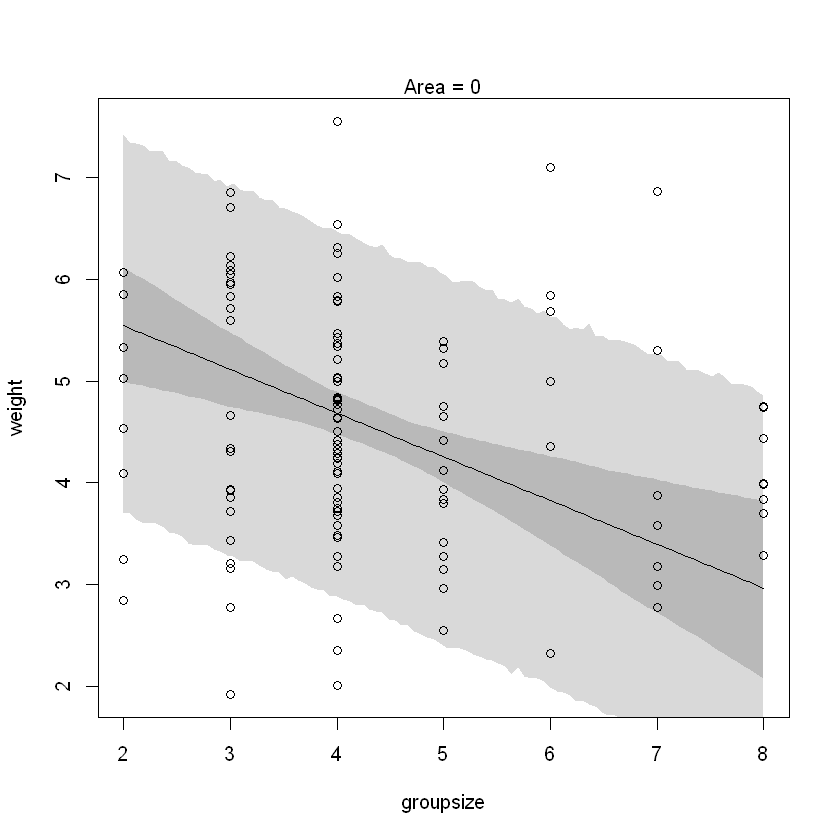

In [40]:
plot(weight ~ groupsize, data = d)
mtext('Area = 0')
lines(gs.seq, mu.gs.mean)
shade(mu.gs.PI, gs.seq)
shade(R.gs.PI, gs.seq)

When including both variables they seem to have a much more significant effect on weight. Groupsize has a negative effective on weight while the size of the area has a positive one. <br>

## H3



       Mean StdDev  5.5% 94.5%
a      4.17   0.43  3.49  4.85
bf     3.63   1.18  1.74  5.51
bg    -0.54   0.15 -0.79 -0.30
sigma  1.12   0.07  1.00  1.23

[ 1000 / 1000 ]
[ 10000 / 10000 ]


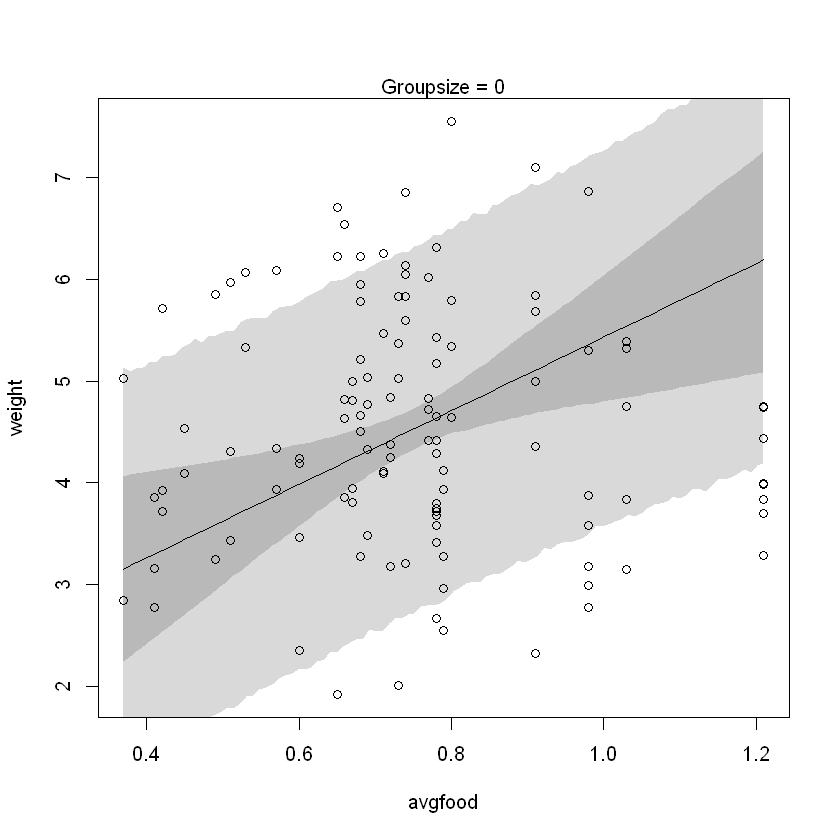

In [50]:
# Bodyweight against avgfood and groupsize
m.foodgs <- map(
  alist(
    weight ~ dnorm(mu, sigma),
    mu  <- a + bf * avgfood + bg * groupsize,
    a ~ dnorm(0, 10),
    bf ~ dnorm(0, 5),
    bg ~ dnorm(0, 5),
    sigma ~ dunif(0, 10)
  ), data = d)
precis(m.foodgs)


food.seq  <- seq(from = min(d$avgfood), to = max(d$avgfood), length.out = 100)
data.pred.food <- data.frame(groupsize = gs.avg, avgfood = food.seq)


mu.food <- link(m.foodgs, data.pred.food)
mu.f.mean <- apply(mu.food, 2, mean)
mu.f.PI <- apply(mu.food, 2, PI, prob = 0.95)
R.f.sim <- sim(m.foodgs, data = data.pred.food, n = 1e4)
R.f.PI <- apply(R.f.sim, 2, PI)

plot(weight ~ avgfood, data = d)
mtext('Groupsize = 0')
lines(food.seq, mu.f.mean)
shade(mu.f.PI, food.seq)
shade(R.f.PI, food.seq)

In [47]:
# Bodyweight against avgfood, groupsize and area
m.all <- map(
  alist(
    weight ~ dnorm(mu, sigma),
    mu  <- a + bf * avgfood + bg * groupsize + a * area,
    a ~ dnorm(0, 10),
    bf ~ dnorm(0, 5),
    ba ~ dnorm(0, 10000),
    bg ~ dnorm(0, 5),
    sigma ~ dunif(0, 10)
  ), data = d)
precis(m.all)

           Mean  StdDev      5.5%    94.5%
a          1.37    0.23      1.00     1.75
bf         3.88    1.63      1.27     6.48
ba    -17207.32 8388.61 -30613.94 -3800.71
bg        -0.98    0.17     -1.26    -0.71
sigma      1.33    0.09      1.19     1.47